In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import PathLineSentences, LineSentence, Word2Vec
from pathlib import Path
import networkx as nx
from sklearn import model_selection, linear_model, preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
%matplotlib inline


**Load random walks from output files**

In [2]:
def computeTheoreticalProbs(file, nodes):
    g_dir = "/Users/Ganymedian/Desktop/dynamic-rw/output/karate-stream/"
    G = nx.read_edgelist(g_dir+file, nodetype=int)
    A = nx.adjacency_matrix(G,nodelist=sorted(nodes)).toarray()
    d_w = np.maximum(A.sum(axis=1), 1)
    M_theory = A.T / d_w
    return M_theory

In [3]:
def read_walks(m, e, wl, nw):
    fname = "s1-" + m + "-wl" + str(wl) + "-nw" + str(nw) + "-e" + str(e)
#     print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname + "-*.txt")
        if f.stat().st_size > 0
    ])
    ars = np.vsplit(rws, 5)
#     print(ars)
#     print(ars[0].shape)
    return ars

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106 108
 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144
 146 148 150 152 154 156]
m1
m2
m3
m4


<function matplotlib.pyplot.show>

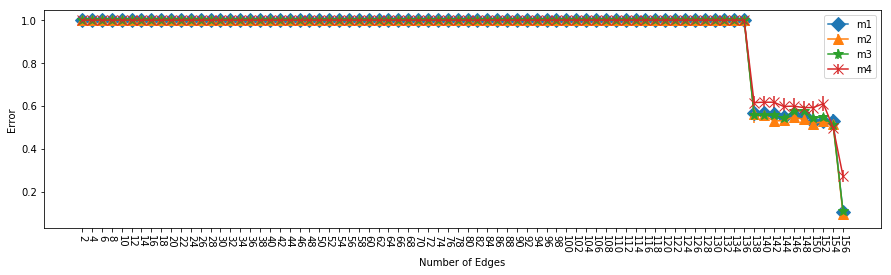

In [5]:
methods = ["m1", "m2", "m3", "m4"]
nmethods = len(methods)
num_runs = 5
wl = 3
nw = 100
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/output/karate-stream")
formats=['D-', '^-', '*-','x-']
n_nodes = 34
n_edges = 156
nodes = np.arange(1,n_nodes+1)
print(nodes)
edges = np.arange(2,n_edges+1, 2)
print(edges)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("Number of Edges")
plt.ylabel("Error")

for mm in range(nmethods):
    print(methods[mm])
    all_errors = []
    for ee in edges:
        runs = read_walks(methods[mm], ee, wl, nw)
        graph_file = methods[mm] + "-g-e" + str(ee) + ".txt"
        M_theory = computeTheoreticalProbs(graph_file, nodes)
#         print(M_theory)
        errors = []
        for rr in range(num_runs):
            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in runs[rr]:
                for kk in range(wl - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).max())

        all_errors.append(errors)

    means = np.mean(all_errors,axis=1)
    stdv = np.std(all_errors, axis=1)
    plt.errorbar(edges, means, yerr=stdv, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(edges, rotation=-90)
    plt.legend()

plt.show

### Computation Cost

In [20]:
def read_computations(m, wl, nw):
#     fname = m + "-steps-to-compute" + "-wl" + str(wl) + "-nw" + str(nw) + ".txt"
    fname = m + "-walkers-to-compute" + "-wl" + str(wl) + "-nw" + str(nw) + ".txt"
    print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname)
        if f.stat().st_size > 0
    ])
#     print(rws.shape)
#     ars = np.vsplit(rws, 5)
#     print(ars[0].shape)
    return rws

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106 108
 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144
 146 148 150 152 154 156]
m1-walkers-to-compute-wl3-nw100.txt
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
m2-walkers-to-compute-wl3-nw100.txt
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          48.98979486  48.98979486   0.          40.
  48.98979486   0.     

<function matplotlib.pyplot.show>

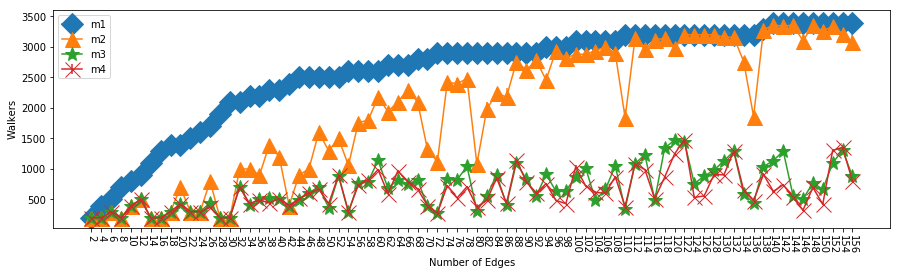

In [22]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("Number of Edges")
# plt.ylabel("Steps")
plt.ylabel("Walkers")

methods = ["m1", "m2", "m3", "m4"]
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/output/karate-stream/")
wl = 3
nw = 100
formats=['D-', '^-', '*-','x-']

x_axis = np.arange(2,157,2)
print(x_axis)
for mm in range(len(methods)):
    runs = read_computations(methods[mm], wl, nw)
#     print(runs)
    mean = np.mean(runs, axis=0)
    stdv = np.std(runs, axis=0)
    print(stdv)
#     print(mean)
    plt.errorbar(x_axis, mean, yerr=stdv, fmt=formats[mm], label=methods[mm], ms=15)
    plt.xticks(x_axis, rotation=-90)
    plt.legend()

plt.show